## ***Import Library***

In [11]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re,string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import csv

**Masukan Credential Twitter**

In [12]:
consumer_key = 'Wn02Vkt660TAWh22cGPHgYVVN'
consumer_secret = 'K00OcKr1F8hUYNjd55QEvaAsGkGVeRp95J0v1Wq8QWQGt7g9my'
access_token = '2464327753-Q1LiTjp7kXD3xHJlTudQJFvbsEqVRXZj7YkMZaf'
access_token_secret = 'zDc9de9oxYo5JLs5QxnGbVXD9mnPPPg9Kw20NirDoSc5k'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

**Crawling untuk mengambil data Indihome**

In [13]:
csvFile = open('Indihome.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "Indihome",count=2000, 
                          lang='id').items(2000):
    print(tweet.text)
    csvWriter.writerow([tweet.text])

@nydgvrls sepertinya itu bkn hpmu kack yg lemot tapi indihome 😢
@xkomodotcom Hallo Kak Febri, guna menstabilkan jaringan dilokasi Kakak, Rikaf sudah bantu refresh jaringan dari si… https://t.co/qVf8IFEJK5
RT @BalapSid: Nyari yang bisa masangin wifi id (wifi yang pake kartu) siapa ya? Biar bisa di pasang dirumah @IndiHome @infomalang
@IndiHome cek inbox min, internet kita ga konek lampu lds nyala merah
Indihome telek, meh nyopet ketinggal terus.
@IndiHome kenapa masih belum ada info mau diperbaiki sampai sekarang saya sudah hampir 3 hari ini wifi dan tv mati
@kucingyoga Kalau bisnisnya lagi dikerjain pakai pesugihan masih butuh orang indihome 🤣
@IndiHome sy tanya klo rusak beli dimana dan harganya brp?
@IndiHome baik, ditunggu informasi selanjutnya ya
@IndiHome sudah di reply tp blm di respon lagi   tanya remote rusak aja ribet yaa
@IndiHome Terimakasih kak indah, saat ini koneksinya sudah lancar ya. Terimakasih
@thahirsyaugi Hai Kak Thahir, mengenai koneksi di no layanan dgn angka tera

In [14]:
df = pd.read_csv("Indihome.csv", header=None)
df

,0
0,@joesukasuka Hallo Sobat. Apakah sudah diperti...
1,"@prasetyown Hai Kak Prasetyo, maaf sudah bikin..."
2,"@astagareji Siang, Kak Reji. Silakan pastikan ..."
3,@IndiHome DHIR @cvlais TOLONG
4,@IndiHome Silahkan cek DM kak
...,...
3956,@IndiHome Jangan lupa nonton film ini di indih...
3957,hiburan dari indihome #thnbaruathome https://t...
3958,@IndiHome Wah keren nih indihome #thnbaruathome
3959,@IndiHome Dari sinopsisnya bagus nih indihome ...


**Lakukan Pra Proses ( Cleaning Data )**

In [15]:
def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    #teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
    teks = hapus_emoji(teks)
    teks = re.sub(r"[-()\"#/@_%;:+<>{}=~|.?,]", "", teks)
    teks = re.sub(r"aku","saya",teks)
    teks = re.sub(r"seller","penjual",teks)
    teks = re.sub(r"sbg","sebagai",teks)
    teks = re.sub(r"&amp",">",teks)
    return teks


def hapus_emoji(teks):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',teks)


#Untuk Menghapus kata Double
def hapus_katadouble(s): 
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)


#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)

    
# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopterm.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 

    
#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    return text
    


#Apply function on review column
df[0] = df[0].apply(cleanText)

df

,0
0,hallo sobat dipertimbangkan kinanti sarankan d...
1,hai prasetyo maaf bikin gak nyaman kondisi jar...
2,siang reji silakan pastikan terpasang kencang ...
3,dhir tolong
4,silahkan cek dm
...,...
3956,nonton film indihome tv thnbaruathome
3957,hiburan indihome thnbaruathome
3958,keren nih indihome thnbaruathome
3959,sinopsisnya bagus nih indihome thnbaruathome


**Tentukan Polarity dan Subjectivity**

In [16]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df[0].apply(getPolarity)
df['Subjectivity'] = df[0].apply(getSubjectivity)

df

,0,Polarity,Subjectivity
0,hallo sobat dipertimbangkan kinanti sarankan d...,0.0,0.0
1,hai prasetyo maaf bikin gak nyaman kondisi jar...,0.0,0.0
2,siang reji silakan pastikan terpasang kencang ...,0.0,0.0
3,dhir tolong,0.0,0.0
4,silahkan cek dm,0.0,0.0
...,...,...,...
3956,nonton film indihome tv thnbaruathome,0.0,0.0
3957,hiburan indihome thnbaruathome,0.0,0.0
3958,keren nih indihome thnbaruathome,0.0,0.0
3959,sinopsisnya bagus nih indihome thnbaruathome,0.0,0.0


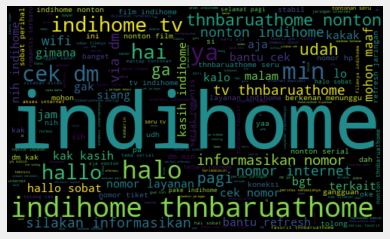

In [17]:
allWords =' '.join([twts for twts in df[0]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Berikan Sentimen pada setiap tweet**

In [18]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,0,Polarity,Subjectivity,Analysis
0,hallo sobat dipertimbangkan kinanti sarankan d...,0.0,0.0,Neutral
1,hai prasetyo maaf bikin gak nyaman kondisi jar...,0.0,0.0,Neutral
2,siang reji silakan pastikan terpasang kencang ...,0.0,0.0,Neutral
3,dhir tolong,0.0,0.0,Neutral
4,silahkan cek dm,0.0,0.0,Neutral
...,...,...,...,...
3956,nonton film indihome tv thnbaruathome,0.0,0.0,Neutral
3957,hiburan indihome thnbaruathome,0.0,0.0,Neutral
3958,keren nih indihome thnbaruathome,0.0,0.0,Neutral
3959,sinopsisnya bagus nih indihome thnbaruathome,0.0,0.0,Neutral


**Kesimpulan**

Sesuai data yang ada ternyata analisis sentimen yang didapat yaitu lebih banyak tweet yang netral. untuk mendapat hasil yang lebih baik bisa di lakukan cleaning dan pembobotan kata.Crawling yang saya gunakan yaitu menggunakan bahasa Indonesia. Untuk mendapat hasil yang lebih baik bisa di lakukan cleaning dan pembobotan kata.


Aminurachma Aisyah (17.52.0001)

In [19]:
df['Analysis'].value_counts()

Neutral     3785
Positive     132
Negative      44
Name: Analysis, dtype: int64